In [1]:
import numpy as np
import quicklook
import matplotlib.pyplot as plt
from os import path as fp

override_chart_skeleton is on:
your chart_skeleton settings are being ignored (x_min_max, y_min_max, xtick_interval, ytick_interval)
your plot_distribution settings are being ignored (distribution_min, distribution_max, bin_interval)

override_chart_skeleton helps you understand the shape and limits of your data.
Once you know the shape and limits of your data, we highly recommend turning off override_chart_skeleton.
When override_chart_skeleton is off, you must set the x_min_max, y_min_max, and bins manually.

x_min_max = (-19.0, 27.0)
bin interval = 4
y_min_max = (0.0, 19.0)
override_chart_skeleton saved in the folder: /Users/alexbreslav/OneDrive - Duke University/6_coding_projects/quicklook/images/plots/histogram


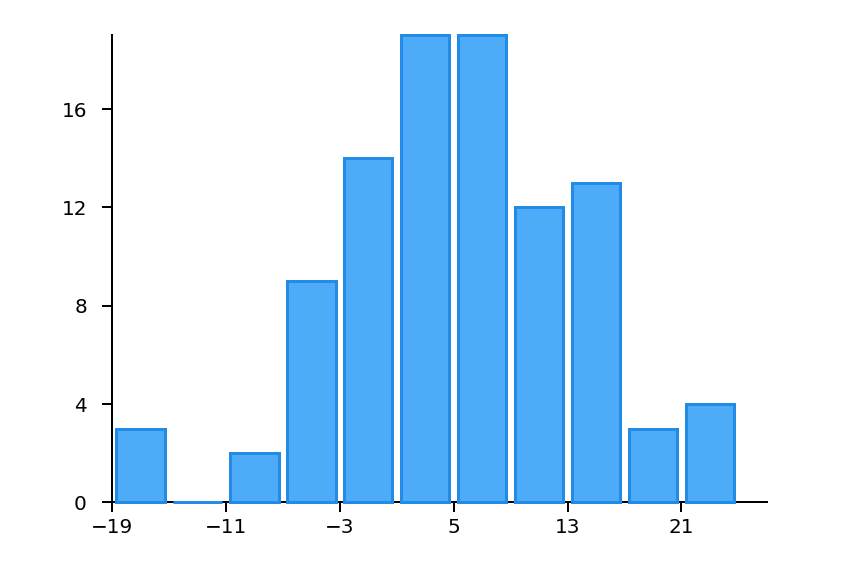

In [2]:
# ---- create arbitrary data
rng = np.random.RandomState(1)
variable1 = rng.normal(5, 10, size=100)

# ---- create chart skeleton
chart_skeleton = quicklook.build_chart_skeleton(size = 'default',
title = '',
xlabel = '',
ylabel = '',
x_min_max = (0,1), y_min_max = (0,1),
xtick_interval = 0.25, ytick_interval = 0.25,
horizontal_gridlines_on = False,
vertical_gridlines_on = False);

# ---- add distribution plot for blue variable using override_chart_skeleton
quicklook.add_distribution_plot(chart_skeleton,
data = variable1,
override_chart_skeleton = True,
distribution_min_max = (None,None),
bin_interval = None,
plot_as_pdf = False,
color_name = 'blue', #['gray', 'red', 'pink', 'grape', 'violet', 'indigo', 'blue', 'cyan', 'teal', 'green', 'lime', 'yellow', 'orange']
color_brightness = 'default', #['default', 'light', 'dark']
opacity = 1,
label_for_legend = '',
layer_order = 1)

# ---- save plot
quicklook.save_chart_to_computer(chart_name = 'override_chart_skeleton',
                     path_to_folder_to_save_chart_in = fp.join(fp.abspath('images'), 'plots', 'histogram'),
                     print_confirmation=True);

simple saved in the folder: /Users/alexbreslav/OneDrive - Duke University/6_coding_projects/quicklook/images/plots/histogram


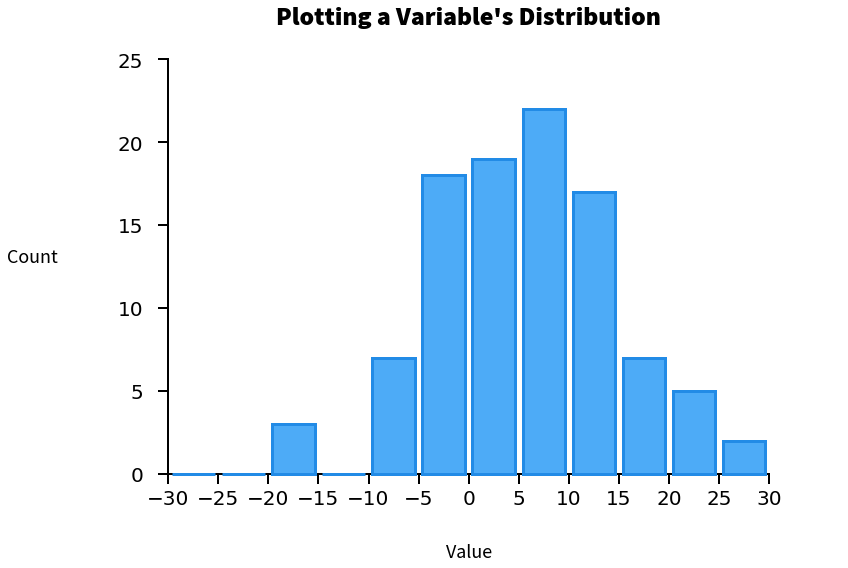

In [3]:
# ---- create chart skeleton
chart_skeleton = quicklook.build_chart_skeleton(size = 'default',
title = 'Plotting a Variable\'s Distribution',
xlabel = 'Value',
ylabel = 'Count',
x_min_max = (-30,30), y_min_max = (0,25),
xtick_interval = 5, ytick_interval = 5,
horizontal_gridlines_on = False,
vertical_gridlines_on = False);

# ---- add distribution plot for blue variable
quicklook.add_distribution_plot(chart_skeleton,
data = variable1,
override_chart_skeleton = False,
distribution_min_max = (-30,30),
bin_interval = 5,
plot_as_pdf = False,
color_name = 'blue', #['gray', 'red', 'pink', 'grape', 'violet', 'indigo', 'blue', 'cyan', 'teal', 'green', 'lime', 'yellow', 'orange']
color_brightness = 'default', #['default', 'light', 'dark']
opacity = 1,
label_for_legend = '',
layer_order = 1)

# ---- save plot
quicklook.save_chart_to_computer(chart_name = 'simple',
                     path_to_folder_to_save_chart_in = fp.join(fp.abspath('images'), 'plots', 'histogram'),
                     print_confirmation=True);

compare saved in the folder: /Users/alexbreslav/OneDrive - Duke University/6_coding_projects/quicklook/images/plots/histogram


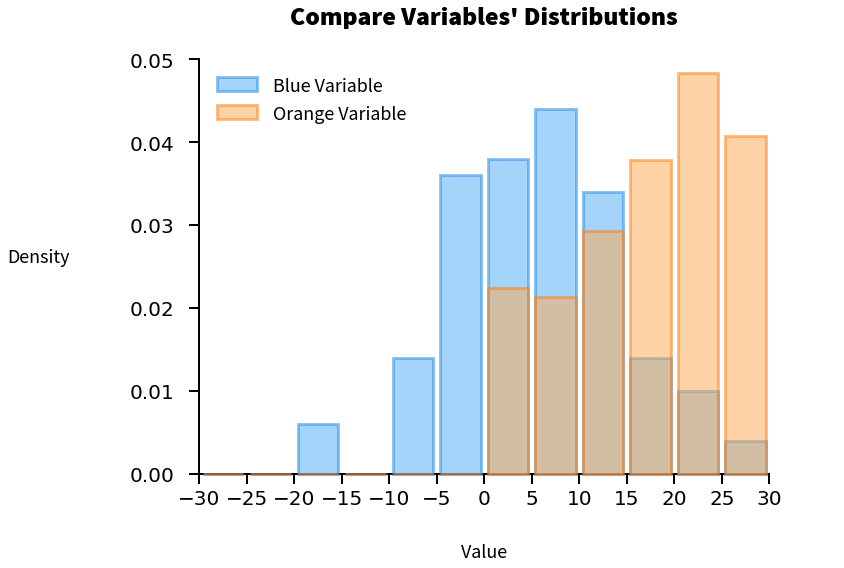

In [4]:
# ---- create arbitrary data
rng = np.random.RandomState(1)
variable1 = rng.normal(5, 10, size=100)
variable2 = abs(rng.normal(25, 15, size=1000))

# ---- create chart skeleton
chart_skeleton = quicklook.build_chart_skeleton(size = 'default',
title = 'Compare Variables\' Distributions',
xlabel = 'Value',
ylabel = 'Density',
x_min_max = (-30,30), y_min_max = (0,0.05),
xtick_interval = 5, ytick_interval = 0.01,
horizontal_gridlines_on = False,
vertical_gridlines_on = False);

# ---- add distribution plot for blue variable
quicklook.add_distribution_plot(chart_skeleton,
data = variable1,
override_chart_skeleton = False,
distribution_min_max = (-30,30),
bin_interval = 5,
plot_as_pdf = True,
color_name = 'blue', #['gray', 'red', 'pink', 'grape', 'violet', 'indigo', 'blue', 'cyan', 'teal', 'green', 'lime', 'yellow', 'orange']
color_brightness = 'default', #['default', 'light', 'dark']
opacity = 0.5,
label_for_legend = 'Blue Variable',
layer_order = 1)

# ---- add distribution plot for orange variable
quicklook.add_distribution_plot(chart_skeleton,
data = variable2,
override_chart_skeleton = False,
distribution_min_max = (-30,30),
bin_interval = 5,
plot_as_pdf = True,
color_name = 'orange', #['gray', 'red', 'pink', 'grape', 'violet', 'indigo', 'blue', 'cyan', 'teal', 'green', 'lime', 'yellow', 'orange']
color_brightness = 'default', #['default', 'light', 'dark']
opacity = 0.5,
label_for_legend = 'Orange Variable',
layer_order = 2)

# ---- add legend
quicklook.add_reference_legend(chart_skeleton,
legend_location = 'best', frame_around_legend=False);

# ---- save plot
quicklook.save_chart_to_computer(chart_name = 'compare',
                     path_to_folder_to_save_chart_in = fp.join(fp.abspath('images'), 'plots', 'histogram'),
                     print_confirmation=True);